In [2]:
import sklearn
from sklearn.model_selection import train_test_split

from pathlib import Path
import pandas as pd


path_data = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/experiments/pair_scoring/Q5/data_random_50k")
dataset = pd.read_csv(path_data)

# path_data_1 = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/experiments/pair_scoring/Q5/data_100k_hn.csv")
# dataset_1 = pd.read_csv(path_data_1)

X = dataset.iloc[:, :-1]
Y = dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=0)
X_train = X_train.iloc[:, 1:]
X_dev = X_dev.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]
print(len(X_train), len(X_dev), len(X_test))

# path_inference_data = Path("/afs/crc.nd.edu/group/dmsquare/vol2/myu2/ComparisonSentences/experiments/pair_scoring/Q11424/data_2k_hn.csv")
# dataset_inference = pd.read_csv(path_inference_data)
# X_infer = dataset_inference.iloc[:, 1:-1]
# Y_infer = dataset_inference.iloc[:, -1]


90000 5000 5000


In [10]:
from sklearn.metrics import r2_score, explained_variance_score, max_error, mean_absolute_error, mean_squared_error, mean_poisson_deviance
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import scipy.stats as stats

regressor = RandomForestRegressor(n_estimators=130, random_state=0)
regressor.fit(X_train, Y_train)
y_pred_train = regressor.predict(X_train)
print("train_r2", r2_score(Y_train, y_pred_train))
y_pred = regressor.predict(X_test)
print("test_r2", r2_score(Y_test, y_pred))
print("test_mae", mean_absolute_error(Y_test, y_pred))
print("test_mse", mean_squared_error(Y_test, y_pred))


print(regressor.feature_importances_)

# as classification / ranking
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, ndcg_score, f1_score
print("ndcg", ndcg_score(np.array([Y_test]), [y_pred]))
print("kendalltau, p", stats.kendalltau(Y_test, y_pred))
y_pred = [1 if x > math.log(1.5) else 0 for x in y_pred]
y_label = [1 if x > math.log(1.5) else 0 for x in Y_test]
print("acc",accuracy_score(y_label, y_pred))
print("p",precision_score(y_label, y_pred))
print("r", recall_score(y_label, y_pred))
print("f1", f1_score(y_label, y_pred))

train_r2 0.9531297666682106
test_r2 0.7443229201770163
test_mae 0.1868538965268013
test_mse 0.12163433911499735
[4.29451598e-02 4.17268239e-02 3.14921215e-02 2.03903539e-02
 3.08933951e-02 2.32396720e-02 1.46509171e-02 9.31373511e-04
 1.49526305e-02 6.64911776e-02 1.59906559e-06 5.69433590e-01
 3.37094787e-02 1.10435553e-02 1.71013989e-02 1.78091055e-02
 2.32475121e-02 3.99401351e-02]
ndcg 0.9597451135280733
kendalltau, p KendalltauResult(correlation=0.7373997741701624, pvalue=0.0)
acc 0.9654
p 0.955735180908391
r 0.9771743408107044
f1 0.9663358630083673


Grid Search

In [9]:
from sklearn.model_selection import GridSearchCV
param_search = {'n_estimators': range(10, 201, 20)}
gsearch = GridSearchCV(estimator=RandomForestRegressor(random_state=10),
                       param_grid=param_search,
                       scoring="r2", 
                       cv=3 )
gsearch.fit(X_dev, Y_dev)
gsearch.cv_results_, gsearch.best_params_, gsearch.best_score_

({'mean_fit_time': array([0.16061735, 0.46703211, 0.82180508, 1.16122111, 1.44993051,
         1.74011397, 2.05632011, 2.36814872, 2.66730054, 2.99415239]),
  'std_fit_time': array([0.00586488, 0.00167089, 0.02357268, 0.01985484, 0.01567037,
         0.01534777, 0.02975151, 0.01588617, 0.01769116, 0.02659146]),
  'mean_score_time': array([0.00437832, 0.00903694, 0.0151097 , 0.02040577, 0.02587867,
         0.0305117 , 0.03771814, 0.04282538, 0.04889512, 0.05371404]),
  'std_score_time': array([2.62226695e-04, 8.69615403e-05, 2.94910986e-04, 1.25133238e-03,
         3.46527605e-04, 1.00332508e-03, 1.40550384e-03, 4.45316140e-04,
         1.15362201e-03, 3.49015648e-04]),
  'param_n_estimators': masked_array(data=[10, 30, 50, 70, 90, 110, 130, 150, 170, 190],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'params': [{'n_estimators': 10},
   {'n_estimators': 30},
   {'

In [12]:
param_test2 = {'max_depth':range(3,20,4), 'min_samples_split':range(10,201,30)}

gsearch = GridSearchCV(estimator=RandomForestRegressor(n_estimators=130, random_state=10),
                       param_grid=param_test2,
                       scoring="r2", 
                       cv=3 )
gsearch.fit(X_train, Y_train)
gsearch.cv_results_, gsearch.best_params_, gsearch.best_score_


In [76]:
# test in another domain
# y_pred = regressor.predict(X_infer)
# print(r2_score(Y_infer, y_pred))
# print(regressor.feature_importances_)

# as classification
import math
from sklearn.metrics import accuracy_score, precision_score, recall_score, ndcg_score
print("ndcg", ndcg_score(np.array([Y_test]), [y_pred]))
y_pred = [1 if x > math.log(2) else 0 for x in y_pred]
y_label = [1 if x > math.log(2) else 0 for x in Y_test]
print("acc",accuracy_score(y_label, y_pred))
print("p",precision_score(y_label, y_pred))
print("r", recall_score(y_label, y_pred))

ndcg 0.9147352462914058
acc 0.83345
p 0.600412571289892
r 0.9923786602486964


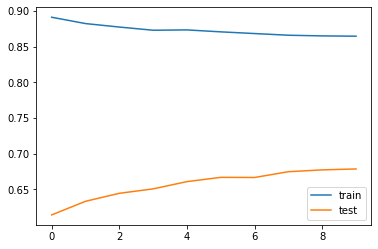

In [47]:
X = dataset.iloc[:, 1:-1]
Y = dataset.iloc[:, -1]

train_score = []
test_score = []
n = 10
num_train_example = int(len(X_train) / n) 
for i in range(n):
    start = i*num_train_example
    end = (i+1)*num_train_example
    regressor = RandomForestRegressor(n_estimators=10, random_state=0)
    regressor.fit(X_train[:end], Y_train[:end])
    y_train_pred = regressor.predict(X_train[:end])
    train_score.append(r2_score(Y_train[:end], y_train_pred))

    y_test_pred = regressor.predict(X_test)
    test_score.append(r2_score(Y_test, y_test_pred))
    
import matplotlib.pyplot as plt
plt.plot([i for i in range(n)], train_score, label="train")
plt.plot([i for i in range(n)], test_score, label="test")
plt.legend()
plt.show()